[[-3.75 -2.    0.    0.   -2.  ]
 [-2.    0.   -2.5   0.    0.  ]
 [ 0.   -2.5   0.   -2.5   0.  ]
 [ 0.    0.   -2.5   0.   -2.5 ]
 [-2.    0.    0.   -2.5   0.  ]]
RESULTADOS PARA O PIRROL (C₄H₅N)

1. NÍVEIS DE ENERGIA:
π_1: -5.799 eV
π_2: -2.972 eV
π_3 (HOMO): -1.545 eV
π_4 (LUMO): 2.521 eV
π_5: 4.045 eV

2. POPULAÇÃO ELETRÔNICA (PET):
N: 1.720
C2: 1.035
C3: 1.106
C4: 1.106
C5: 1.035

3. ORDEM DE LIGAÇÃO (OL):
N-C2: 0.440
N-C5: 0.440
C2-C3: 0.790
C3-C4: 0.553
C4-C5: 0.790


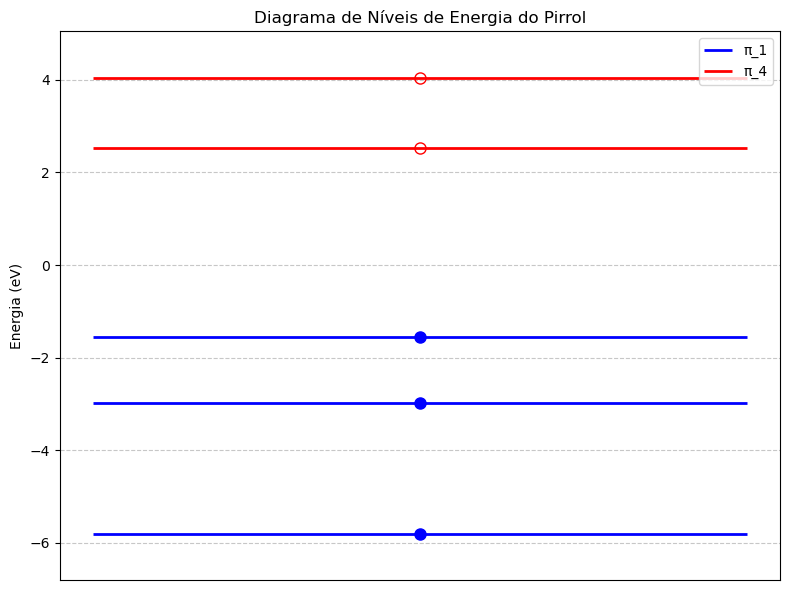

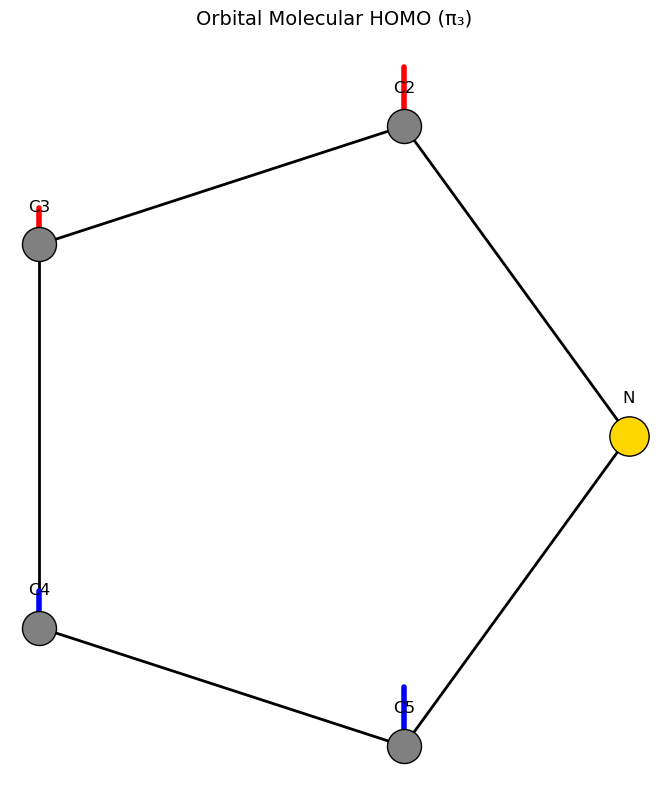

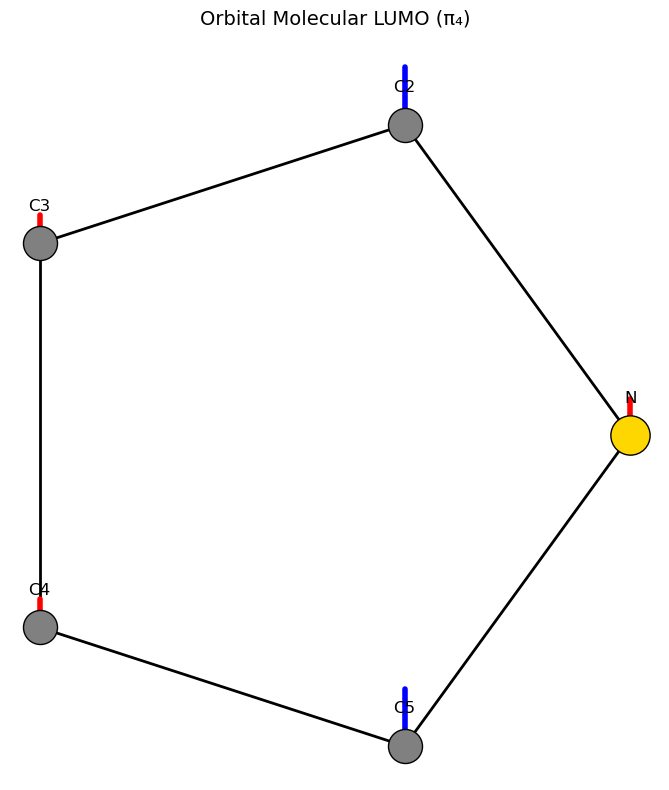

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros de Hückel (em eV)
beta0 = -2.5
alpha0 = 0.0
alpha_N = alpha0 + 1.5 * beta0
alpha_C = alpha0
beta_CN = 0.8 * beta0
beta_CC = 1.0 * beta0

# Matriz de Hamiltoniano (5x5) - Ordem: [N, C2, C3, C4, C5]
H = np.array([
    [alpha_N, beta_CN, 0.0, 0.0, beta_CN],
    [beta_CN, alpha_C, beta_CC, 0.0, 0.0],
    [0.0, beta_CC, alpha_C, beta_CC, 0.0],
    [0.0, 0.0, beta_CC, alpha_C, beta_CC],
    [beta_CN, 0.0, 0.0, beta_CC, alpha_C]
])

# Diagonalização da matriz
print(H)
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Número de elétrons π
n_electrons = 6
occupied_orbitals = n_electrons // 2

# Energias e orbitais ordenados
sorted_indices = np.argsort(eigenvalues)
energies = eigenvalues[sorted_indices]
orbitals = eigenvectors[:, sorted_indices].T

# População Eletrônica Total (PET)
PET = np.zeros(5)
for j in range(occupied_orbitals):
    PET += 2 * (orbitals[j, :] ** 2)

# Ordem de Ligação (OL)
bonds = [(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]  # (N-C2), (N-C5), (C2-C3), (C3-C4), (C4-C5)
OL = {}
for bond in bonds:
    i, j = bond
    ol_val = 0.0
    for k in range(occupied_orbitals):
        ol_val += 2 * orbitals[k, i] * orbitals[k, j]
    OL[bond] = ol_val

# Resultados
print("="*50)
print("RESULTADOS PARA O PIRROL (C₄H₅N)")
print("="*50)

# 1. Níveis de Energia (eV)
print("\n1. NÍVEIS DE ENERGIA:")
for i, E in enumerate(energies):
    orbital_type = " (HOMO)" if i == occupied_orbitals - 1 else " (LUMO)" if i == occupied_orbitals else ""
    print(f"π_{i+1}{orbital_type}: {E:.3f} eV")

# 2. População Eletrônica (PET)
atom_labels = ['N', 'C2', 'C3', 'C4', 'C5']
print("\n2. POPULAÇÃO ELETRÔNICA (PET):")
for atom, pop in zip(atom_labels, PET):
    print(f"{atom}: {pop:.3f}")

# 3. Ordem de Ligação (OL)
bond_labels = {
    (0,1): "N-C2", 
    (0,4): "N-C5", 
    (1,2): "C2-C3", 
    (2,3): "C3-C4", 
    (3,4): "C4-C5"
}
print("\n3. ORDEM DE LIGAÇÃO (OL):")
for bond, ol_val in OL.items():
    print(f"{bond_labels[bond]}: {ol_val:.3f}")

# 4. Diagrama de Níveis de Energia
plt.figure(figsize=(8,6))
for i, energy in enumerate(energies):
    if i < occupied_orbitals:
        plt.hlines(energy, 0, 1, colors='blue', linewidth=2, label=f'π_{i+1}' if i ==0 else "")
        plt.plot(0.5, energy, 'o', markersize=8, color='blue')
    else:
        plt.hlines(energy, 0, 1, colors='red', linewidth=2, label=f'π_{i+1}' if i == occupied_orbitals else "")
        plt.plot(0.5, energy, 'o', markersize=8, color='red', fillstyle='none')
plt.title("Diagrama de Níveis de Energia do Pirrol")
plt.ylabel("Energia (eV)")
plt.xticks([])
plt.ylim(min(energies)-1, max(energies)+1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('niveis_energia_pirrol.png')
plt.show()

# 5. Esboço dos Orbitais HOMO e LUMO
def plot_orbital(coeffs, title, filename):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Coordenadas do anel (pentagonal)
    angles = np.linspace(0, 2*np.pi, 6)[:-1]
    coords = np.array([(np.cos(ang), np.sin(ang)) for ang in angles])
    
    # Plot átomos
    colors = ['gold' if label=='N' else 'gray' for label in atom_labels]
    sizes = [800 if label=='N' else 600 for label in atom_labels]
    for i, (x,y) in enumerate(coords):
        ax.scatter(x, y, s=sizes[i], c=colors[i], edgecolors='black', zorder=10)
        ax.text(x, y+0.1, atom_labels[i], ha='center', fontsize=12)
    
    # Plot ligações
    bond_connections = [(0,1), (1,2), (2,3), (3,4), (4,0)]
    for i,j in bond_connections:
        ax.plot([coords[i,0], coords[j,0]], [coords[i,1], coords[j,1]], 'k-', lw=2)
    
    # Plot orbitais pz
    scale = 0.3
    for i, (x,y) in enumerate(coords):
        sign = np.sign(coeffs[i])
        color = 'blue' if sign > 0 else 'red'
        ax.plot([x, x], [y, y + scale*abs(coeffs[i])], lw=4, color=color, solid_capstyle='round')
    
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# HOMO (π3) e LUMO (π4)
homo_coeffs = orbitals[occupied_orbitals-1, :]
lumo_coeffs = orbitals[occupied_orbitals, :]

plot_orbital(homo_coeffs, "Orbital Molecular HOMO (π₃)", "homo_pirrol.png")
plot_orbital(lumo_coeffs, "Orbital Molecular LUMO (π₄)", "lumo_pirrol.png")


RESULTADOS COMPUTACIONAIS PARA ACENOS

NAFTALENO (10 átomos, 12 ligações)
Gap HOMO-LUMO: 0.000 eV

Níveis de Energia (eV):
Ocupados:  -3.501  -0.880  -0.000
HOMO: -0.000 eV
LUMO: 0.000 eV
Vazios:   1.235  2.707  4.789

ANTRACENO (14 átomos, 18 ligações)
Gap HOMO-LUMO: 0.000 eV

Níveis de Energia (eV):
Ocupados:  -1.120  -0.000  -0.000
HOMO: -0.000 eV
LUMO: 0.000 eV
Vazios:   0.000  0.980  3.234

TETRACENO (18 átomos, 24 ligações)
Gap HOMO-LUMO: 0.000 eV

Níveis de Energia (eV):
Ocupados:  -0.000  -0.000  -0.000
HOMO: -0.000 eV
LUMO: 0.000 eV
Vazios:   0.000  0.000  1.076

PENTACENO (22 átomos, 30 ligações)
Gap HOMO-LUMO: 0.000 eV

Níveis de Energia (eV):
Ocupados:  -0.000  -0.000  -0.000
HOMO: -0.000 eV
LUMO: -0.000 eV
Vazios:   0.000  0.000  0.000


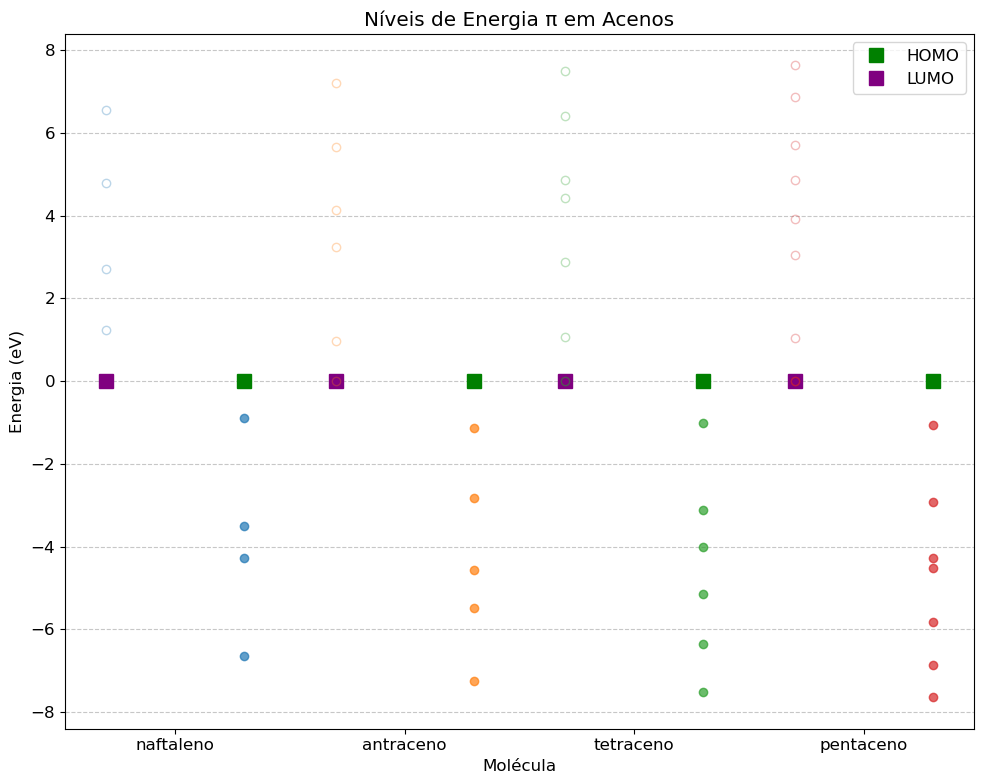

C:\Users\p.mazzola\AppData\Local\Temp\ipykernel_14156\4081611479.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


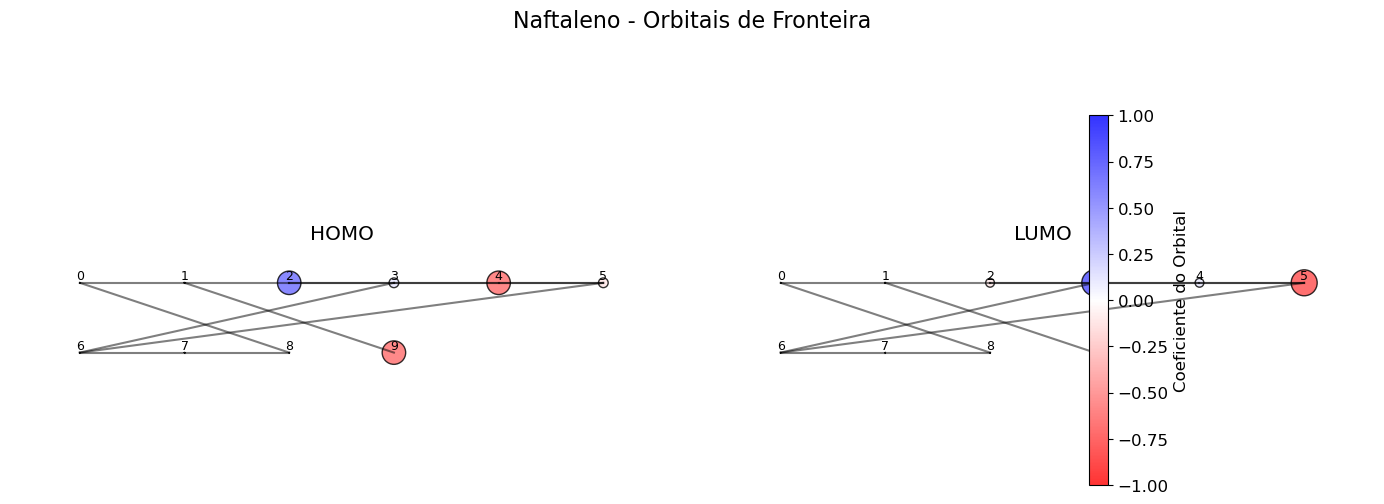

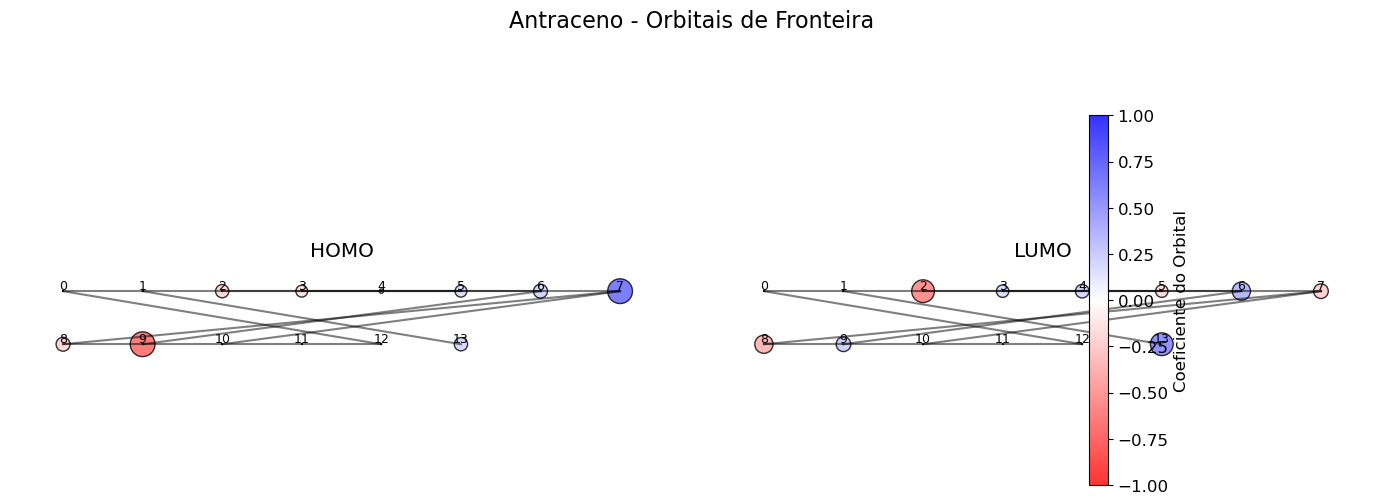

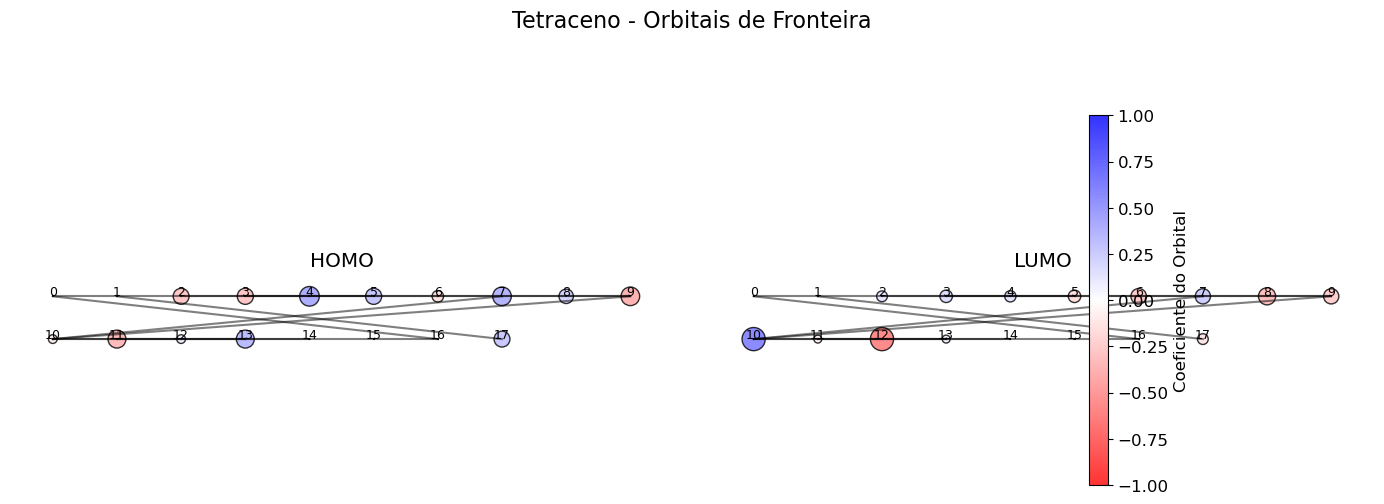

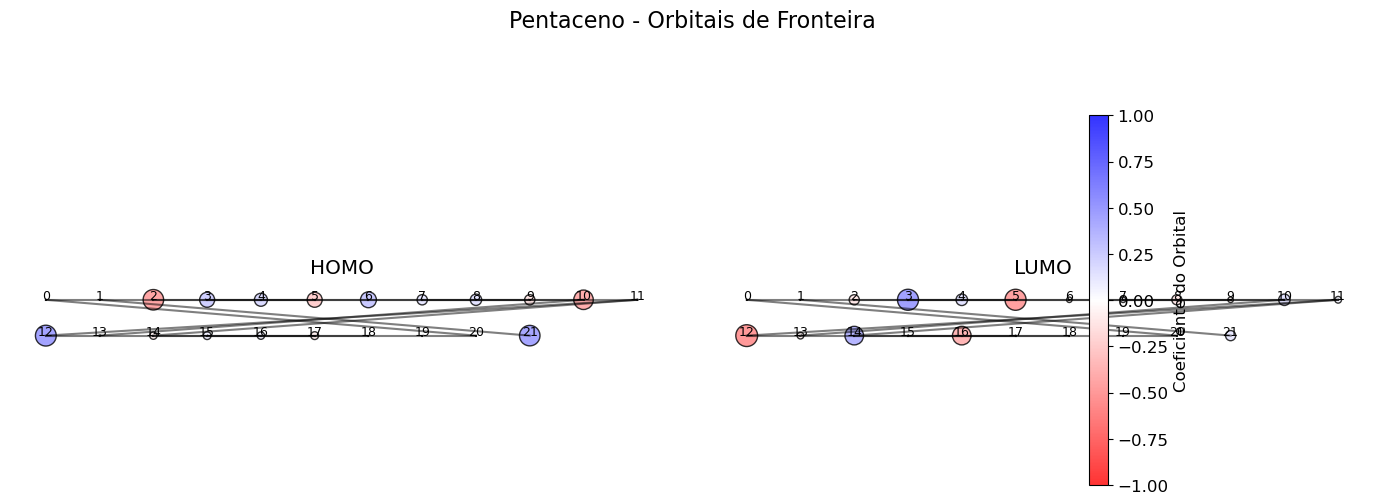

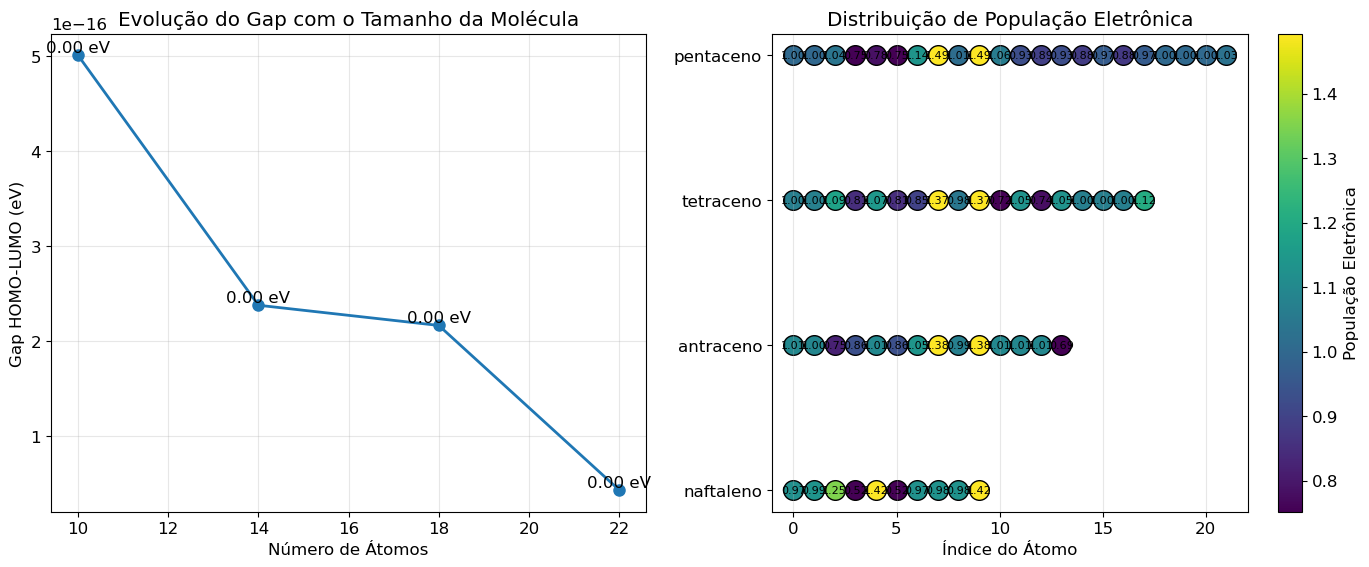

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap

# Configurações gerais
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

# Parâmetros de Hückel
alpha = 0.0  # Energia de referência
beta = -2.5  # Integral de ressonância (eV)

# Função para construir a matriz de Hückel
def build_huckel_matrix(n_atoms, bonds):
    """
    Constrói a matriz de Hückel para uma molécula
    :param n_atoms: Número de átomos
    :param bonds: Lista de tuplas (i, j) representando ligações
    :return: Matriz de Hamiltoniano (n_atoms x n_atoms)
    """
    H = np.zeros((n_atoms, n_atoms))
    np.fill_diagonal(H, alpha)  # Elementos diagonais
    
    for i, j in bonds:
        H[i, j] = beta
        H[j, i] = beta
    
    return H

# Função para calcular propriedades eletrônicas
def compute_acene_properties(name, n_rings):
    """
    Calcula propriedades para um aceno com n_rings anéis
    :param name: Nome da molécula
    :param n_rings: Número de anéis
    :return: Dicionário com todas as propriedades calculadas
    """
    # Definir geometria e conectividade
    n_atoms = 4 * n_rings + 2
    bonds = []
    
    # Construir ligações - padrão para acenos lineares
    for ring in range(n_rings):
        start = 4 * ring
        # Adicionar ligações dentro do anel
        bonds.append((start, start + 1))
        bonds.append((start + 1, start + 2))
        bonds.append((start + 2, start + 3))
        bonds.append((start + 3, start + 4))
        
        # Conectar ao próximo anel
        if ring < n_rings - 1:
            bonds.append((start + 2, start + 5))
            bonds.append((start + 3, start + 6))
    
    # Adicionar ligações finais
    bonds.append((0, n_atoms - 2))
    bonds.append((1, n_atoms - 1))
    
    # Construir matriz de Hückel
    H = build_huckel_matrix(n_atoms, bonds)
    
    # Diagonalizar
    eigvals, eigvecs = np.linalg.eigh(H)
    
    # Número de elétrons π (1 por carbono)
    n_electrons = n_atoms
    homo_index = n_electrons // 2 - 1
    lumo_index = n_electrons // 2
    
    # Calcular gap
    gap = eigvals[lumo_index] - eigvals[homo_index]
    
    # Calcular população por sítio
    q_i = np.zeros(n_atoms)
    for mu in range(homo_index + 1):  # Orbitais ocupados
        q_i += 2 * eigvecs[:, mu] ** 2
    
    # Calcular ordem de ligação
    p_ij = {}
    for bond in bonds:
        i, j = bond
        p = 0.0
        for mu in range(homo_index + 1):  # Orbitais ocupados
            p += 2 * eigvecs[i, mu] * eigvecs[j, mu]
        p_ij[bond] = p
    
    # Gerar coordenadas para plotagem
    G = nx.Graph()
    G.add_nodes_from(range(n_atoms))
    G.add_edges_from(bonds)
    
    # Posicionar átomos em estrutura linear
    pos = {}
    row_length = 2 * n_rings + 2
    
    # Fileira superior
    for i in range(row_length):
        pos[i] = (i * 1.5, 1.0)
    
    # Fileira inferior
    for i in range(row_length, n_atoms):
        pos[i] = ((i - row_length) * 1.5, 0.0)
    
    # Criar matriz de coordenadas
    coords = np.array([pos[i] for i in range(n_atoms)])
    
    return {
        'name': name,
        'n_rings': n_rings,
        'n_atoms': n_atoms,
        'bonds': bonds,
        'eigvals': eigvals,
        'eigvecs': eigvecs,
        'gap': gap,
        'q_i': q_i,
        'p_ij': p_ij,
        'coords': coords,
        'homo_index': homo_index,
        'lumo_index': lumo_index
    }

# Função para plotar níveis de energia
def plot_energy_levels(results):
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    for i, (mol, color) in enumerate(zip(results, colors)):
        eigvals = mol['eigvals']
        n_electrons = mol['n_atoms']
        homo = mol['homo_index']
        lumo = mol['lumo_index']
        
        # Plotar todos os níveis
        for j, energy in enumerate(eigvals):
            y = energy
            x = i + 0.3 if j <= homo else i - 0.3  # Separar ocupados/vazios
            
            if j == homo:
                ax.plot(x, y, 's', markersize=10, color='green', label='HOMO' if i == 0 else "")
            elif j == lumo:
                ax.plot(x, y, 's', markersize=10, color='purple', label='LUMO' if i == 0 else "")
            elif j <= homo:
                ax.plot(x, y, 'o', markersize=6, color=color, alpha=0.7)
            else:
                ax.plot(x, y, 'o', markersize=6, color=color, alpha=0.3, fillstyle='none')
    
    # Configurações do gráfico
    ax.set_xticks(range(len(results)))
    ax.set_xticklabels([mol['name'] for mol in results])
    ax.set_xlabel('Molécula')
    ax.set_ylabel('Energia (eV)')
    ax.set_title('Níveis de Energia π em Acenos')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    
    plt.tight_layout()
    plt.savefig('acenes_energy_levels.png', dpi=300)
    plt.show()

# Função para plotar mapas orbitais
def plot_orbital_maps(results):
    # Paleta de cores para fases positiva/negativa
    cmap = LinearSegmentedColormap.from_list('phase_cmap', ['#FF0000', '#FFFFFF', '#0000FF'])
    
    for mol in results:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f"{mol['name'].capitalize()} - Orbitais de Fronteira", fontsize=16)
        
        # Coordenadas e coeficientes
        coords = mol['coords']
        homo_vec = mol['eigvecs'][:, mol['homo_index']]
        lumo_vec = mol['eigvecs'][:, mol['lumo_index']]
        
        # Normalizar para tamanho das bolhas
        homo_size = 500 * np.abs(homo_vec)
        lumo_size = 500 * np.abs(lumo_vec)
        
        # Plot HOMO
        sc1 = ax1.scatter(coords[:, 0], coords[:, 1], s=homo_size, c=homo_vec, 
                         cmap=cmap, vmin=-1, vmax=1, edgecolors='k', alpha=0.8)
        ax1.set_title('HOMO')
        
        # Plot LUMO
        sc2 = ax2.scatter(coords[:, 0], coords[:, 1], s=lumo_size, c=lumo_vec, 
                         cmap=cmap, vmin=-1, vmax=1, edgecolors='k', alpha=0.8)
        ax2.set_title('LUMO')
        
        # Adicionar ligações
        for bond in mol['bonds']:
            i, j = bond
            for ax in (ax1, ax2):
                ax.plot([coords[i, 0], coords[j, 0]], 
                       [coords[i, 1], coords[j, 1]], 'k-', lw=1.5, alpha=0.5)
        
        # Adicionar rótulos dos átomos
        for i, (x, y) in enumerate(coords):
            for ax in (ax1, ax2):
                ax.text(x, y + 0.1, str(i), ha='center', va='center', fontsize=9)
        
        # Configurações comuns
        for ax in (ax1, ax2):
            ax.set_aspect('equal')
            ax.axis('off')
            ax.set_xlim(np.min(coords[:, 0]) - 1, np.max(coords[:, 0]) + 1)
            ax.set_ylim(np.min(coords[:, 1]) - 0.5, np.max(coords[:, 1]) + 0.5)
        
        # Adicionar barra de cores
        cbar = fig.colorbar(sc2, ax=[ax1, ax2], shrink=0.8)
        cbar.set_label('Coeficiente do Orbital')
        
        plt.tight_layout()
        plt.savefig(f"{mol['name']}_orbitals.png", dpi=300)
        plt.show()

# Função para plotar propriedades moleculares
def plot_molecular_properties(results):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plotar gap HOMO-LUMO
    gaps = [mol['gap'] for mol in results]
    names = [mol['name'] for mol in results]
    n_atoms = [mol['n_atoms'] for mol in results]
    
    ax1.plot(n_atoms, gaps, 'o-', lw=2, markersize=8)
    ax1.set_xlabel('Número de Átomos')
    ax1.set_ylabel('Gap HOMO-LUMO (eV)')
    ax1.set_title('Evolução do Gap com o Tamanho da Molécula')
    ax1.grid(alpha=0.3)
    
    # Adicionar rótulos
    for i, (x, y) in enumerate(zip(n_atoms, gaps)):
        ax1.text(x, y, f'{y:.2f} eV', ha='center', va='bottom')
    
    # Plotar distribuição de carga
    cmap = plt.get_cmap('viridis')
    for i, mol in enumerate(results):
        y_offset = i * 0.5
        q_i = mol['q_i']
        atoms = range(len(q_i))
        
        # Normalizar cores pela população
        norm = plt.Normalize(min(q_i), max(q_i))
        colors = cmap(norm(q_i))
        
        for j, pop in enumerate(q_i):
            ax2.scatter(j, y_offset, s=200, c=[colors[j]], edgecolors='k')
            ax2.text(j, y_offset, f'{pop:.2f}', ha='center', va='center', fontsize=8)
    
    # Configurar eixo de cargas
    ax2.set_yticks([i * 0.5 for i in range(len(results))])
    ax2.set_yticklabels(names)
    ax2.set_xlabel('Índice do Átomo')
    ax2.set_title('Distribuição de População Eletrônica')
    ax2.grid(axis='x', alpha=0.3)
    
    # Adicionar barra de cores
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax2)
    cbar.set_label('População Eletrônica')
    
    plt.tight_layout()
    plt.savefig('acenes_properties.png', dpi=300)
    plt.show()

# Função para imprimir resultados em tabela
def print_results_table(results):
    print("\n" + "="*80)
    print("RESULTADOS COMPUTACIONAIS PARA ACENOS")
    print("="*80)
    
    for mol in results:
        print(f"\n{mol['name'].upper()} ({mol['n_atoms']} átomos, {len(mol['bonds'])} ligações)")
        print(f"Gap HOMO-LUMO: {mol['gap']:.3f} eV")
        
        # Imprimir 5 energias mais altas ocupadas e mais baixas não ocupadas
        n = mol['n_atoms']
        print("\nNíveis de Energia (eV):")
        print("Ocupados: ", "  ".join([f"{e:.3f}" for e in mol['eigvals'][n//2-3:n//2]]))
        print(f"HOMO: {mol['eigvals'][mol['homo_index']]:.3f} eV")
        print(f"LUMO: {mol['eigvals'][mol['lumo_index']]:.3f} eV")
        print("Vazios:  ", "  ".join([f"{e:.3f}" for e in mol['eigvals'][n//2+1:n//2+4]]))

# ================================================
# Cálculo principal para todas as moléculas
# ================================================

acenes = [
    {'name': 'naftaleno', 'rings': 2},
    {'name': 'antraceno', 'rings': 3},
    {'name': 'tetraceno', 'rings': 4},
    {'name': 'pentaceno', 'rings': 5}
]

# Calcular propriedades para todos os acenos
results = []
for acene in acenes:
    res = compute_acene_properties(acene['name'], acene['rings'])
    results.append(res)

# Gerar visualizações
print_results_table(results)
plot_energy_levels(results)
plot_orbital_maps(results)
plot_molecular_properties(results)

# Salvar resultados em arquivo
np.savez('acenes_huckel_results.npz', results=results)